# Keras CNN - Malaria custom data

- toc: true
- badges: False
- comments: true
- author: Sam Treacy
- categories: [Keras, CNN, Tensorflow, classification, python]

In [110]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [111]:
pwd

'/Users/samtreacy/OneDrive - TietoEVRY/00_Analysis/Jupyter/Tensorflow_Cert/Summaries_to_Study'

In [112]:
my_data_dir = '/Users/samtreacy/OneDrive - TietoEVRY/00_Analysis/Jupyter/Tensorflow_Cert/Summaries_to_Study' + '/DATA/Malaria_cells'

In [113]:
my_data_dir

'/Users/samtreacy/OneDrive - TietoEVRY/00_Analysis/Jupyter/Tensorflow_Cert/Summaries_to_Study/DATA/Malaria_cells'

In [114]:
os.listdir(my_data_dir)

['test', 'train']

In [115]:
train_path = my_data_dir + '/train'
test_path = my_data_dir + '/test'


In [116]:
test_path

'/Users/samtreacy/OneDrive - TietoEVRY/00_Analysis/Jupyter/Tensorflow_Cert/Summaries_to_Study/DATA/Malaria_cells/test'

In [117]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [118]:
os.listdir(train_path + '/parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [119]:
para_cell = train_path + '/parasitized/' + 'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [120]:
para_cell = imread(para_cell)

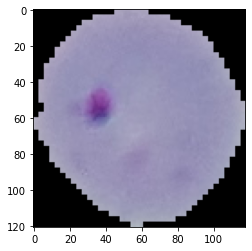

In [121]:
plt.imshow(para_cell)

In [122]:
para_cell.shape

(121, 118, 3)

### Image count

In [123]:
len( os.listdir(train_path + '/parasitized/'))

12479

In [84]:
len( os.listdir(train_path + '/uninfected/'))

12480

### Average image dimension

In [99]:
dim1 = []
dim2 = []

for image_filename in os.listdir(train_path + '/uninfected/'):
    
    img = imread(train_path + '/uninfected/' + image_filename)
    d1, d2, colours = img.shape
    dim1.append(d1)
    dim2.append(d2)

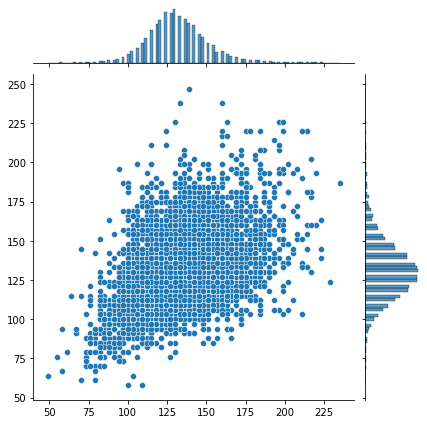

In [100]:
sns.jointplot(x=dim1, y=dim2);

In [101]:
np.mean(dim1)

131.64820899110507

In [102]:
np.mean(dim2)

131.4041990544114

### Set default image shape

In [103]:
image_shape = (130, 130, 3)

# Prepare Data

In [105]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [108]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               rescale =1/255, 
                               shear_range=0.1,
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest'
                              )

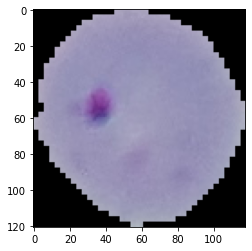

In [129]:
plt.imshow(para_cell);

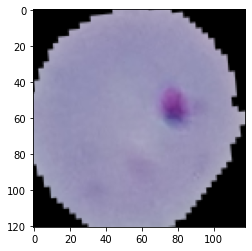

In [128]:
plt.imshow(image_gen.random_transform(para_cell));

# Flow images from Directory

In [130]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [131]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Create Model

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, Dropout, MaxPool2D

In [167]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 activation='relu', input_shape=image_shape))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 activation='relu', input_shape=image_shape))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 activation='relu', input_shape=image_shape))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [168]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)             

In [169]:
image_shape

(130, 130, 3)

# Early Stopping

In [170]:
from tensorflow.keras.callbacks import EarlyStopping

In [171]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Train Model

In [477]:
batch_size = 256

In [478]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                                target_size=image_shape[:2],
                                                color_mode='rgb', 
                                                batch_size=batch_size,
                                                shuffle = False,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [479]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                                target_size=image_shape[:2],
                                                color_mode='rgb', 
                                                batch_size=batch_size,
                                                shuffle = False,  
                                                class_mode='binary')

Found 2600 images belonging to 2 classes.


In [480]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [481]:
model.fit_generator(train_image_gen, epochs=3,
                    validation_data=test_image_gen, 
                    callbacks = [early_stop])

Epoch 1/3
98/98 [==============================] - 1195s 12s/step - loss: 0.3403 - accuracy: 0.8714 - val_loss: 0.1936 - val_accuracy: 0.9385
Epoch 2/3
98/98 [==============================] - 1857s 19s/step - loss: 0.2553 - accuracy: 0.9203 - val_loss: 0.2006 - val_accuracy: 0.9350
Epoch 3/3
98/98 [==============================] - 1208s 12s/step - loss: 0.1927 - accuracy: 0.9381 - val_loss: 0.2146 - val_accuracy: 0.9277


### Save Model

In [488]:
from tensorflow.keras.models import load_model
model.save('marlaria_detector.h5')

### Evaluate Model

In [489]:
losses = pd.DataFrame(model.history.history)

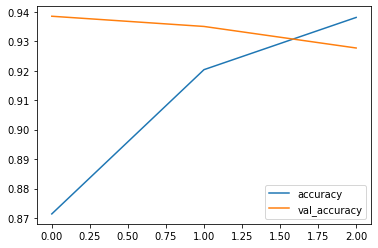

In [490]:
losses[['accuracy', 'val_accuracy']].plot();

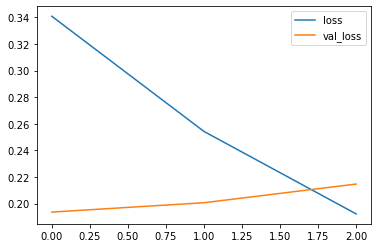

In [491]:
losses[['loss', 'val_loss']].plot();

In [492]:
model.metrics_names

['loss', 'accuracy']

In [494]:
model.evaluate_generator(test_image_gen)

[0.21619475903836163, 0.9288462]

In [495]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras

pred_probabilities = model.predict_generator(test_image_gen, workers = 0)

In [497]:
pred_probabilities[1:10]

array([[1.7757118e-03],
       [1.7362297e-02],
       [1.8446982e-02],
       [2.9427925e-01],
       [3.6358833e-06],
       [1.4031053e-02],
       [8.5830688e-06],
       [1.0720789e-03],
       [5.3215027e-04]], dtype=float32)

In [515]:
trueClass = test_image_gen.classes

In [516]:
predictions = pred_probabilities > 0.5

In [517]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [518]:
from sklearn.metrics import classification_report, confusion_matrix

In [519]:
print(classification_report(trueClass,  predictions )) 

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1300
           1       0.88      0.98      0.93      1300

    accuracy                           0.92      2600
   macro avg       0.93      0.92      0.92      2600
weighted avg       0.93      0.92      0.92      2600



In [520]:
confusion_matrix( test_image_gen.classes, predictions )

array([[1127,  173],
       [  23, 1277]])

# Predict Image

In [521]:
from tensorflow.keras.preprocessing import image

In [522]:
para_cell = train_path + '/parasitized/' + 'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [523]:
para_cell

'/Users/samtreacy/OneDrive - TietoEVRY/00_Analysis/Jupyter/Tensorflow_Cert/Summaries_to_Study/DATA/Malaria_cells/train/parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png'

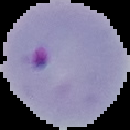

In [524]:
my_image = image.load_img(para_cell, target_size=image_shape)
my_image

In [525]:
my_image = image.img_to_array(my_image)

In [526]:
my_image.shape

(130, 130, 3)

In [527]:
my_image.reshape(1, 130, 130, 3).shape

(1, 130, 130, 3)

In [528]:
model.predict(my_image.reshape(1, 130, 130, 3))

array([[0.]], dtype=float32)

In [529]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [530]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}